In [1]:
import torch

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Get data

Food101 dataset

In [3]:
import requests
import zipfile
from pathlib import Path

#setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#if the image folder does not exits, it should create one
if image_path.is_dir():
  print(f"{image_path} already exists")
else:
  print(f"{image_path} does not exist, creating data folder")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating data folder
Unzipping pizza, steak, sushi data...


## load the data

In [4]:
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its contensts."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [7]:
import random
from PIL import Image

#set seed
random.seed(42)

#get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/train/pizza/1649276.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3821701.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/220190.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1412034.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1033251.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/393658.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2285942.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2493954.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1089334.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1285298.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3281494.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2291093.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2154394.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/715169.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3109486.jpg'),
 PosixPath(

In [8]:
# pick a random image path
random.seed(42)
random_image_path = random.choice(image_path_list)
print(random_image_path)

data/pizza_steak_sushi/train/pizza/1572608.jpg


In [9]:
image_class = random_image_path.parent.stem
image_class

'pizza'

Random image path: data/pizza_steak_sushi/train/pizza/1572608.jpg
image class: pizza
image height: 512
image width: 512


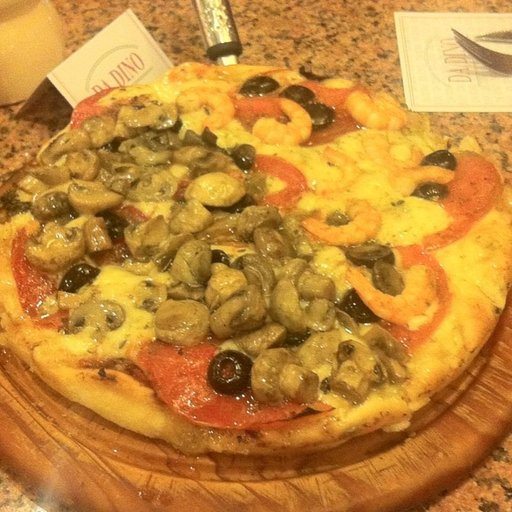

In [10]:
img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

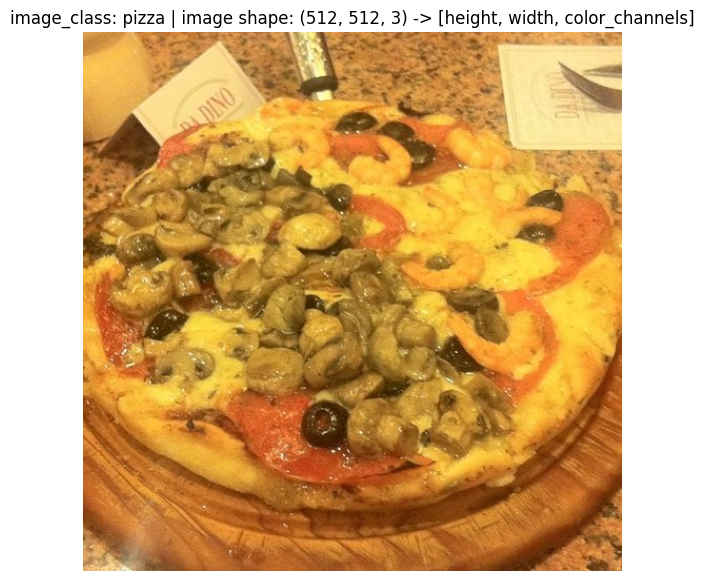

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#turn image into array
img_as_array = np.asarray(img)

#plot
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image_class: {image_class} | image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

## transforming data into tensors using `torchvision.transforms`

In [12]:
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
##jpg --> tensor representations

In [14]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

## this can be used also to perform image augmentation

In [15]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [16]:
def plot_transformed_images(image_path, transform, n=3, seed=None):
  """
  selects random images from path of images and
  loads/tranforms them and then plots the orginal vs the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_path = random.sample(image_path_list, k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      #transfomr and plot target image
      transformed_img = transform(f).permute(1,2,0) #we are changing shape for matplotlib (C,H,W) -> (H,W,C)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed\nShape: {transformed_img.shape}")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

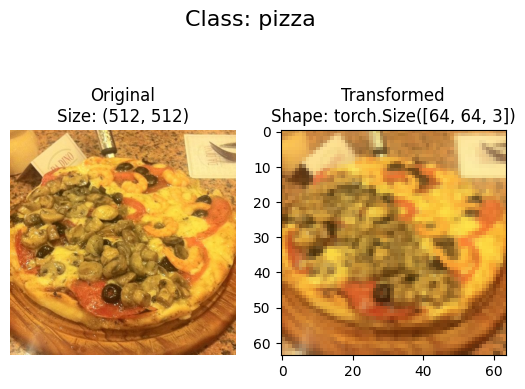

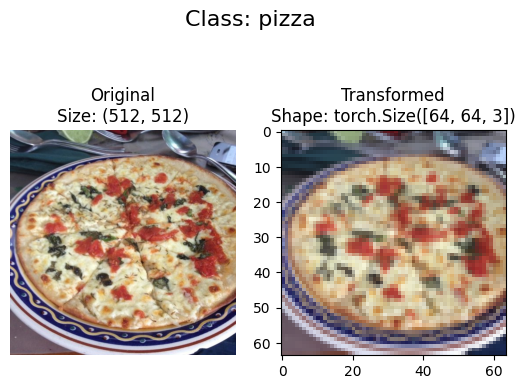

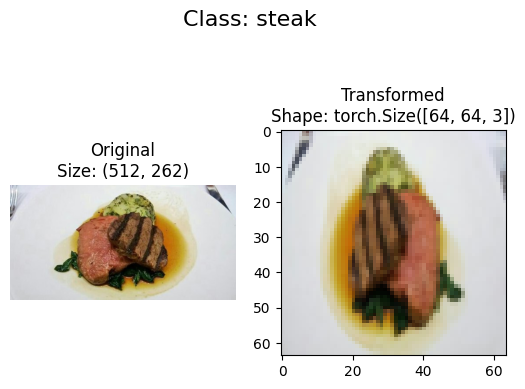

In [17]:
plot_transformed_images(image_path=image_path,
                        transform=data_transform,
                        n=3,
                        seed=42)

## option 1: Loading image data using `ImageFolder`

In [18]:
#use ImageFolder to create datasets

from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [19]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [20]:
#get class names
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

## visualising loaded image from dataset

In [23]:
# index on the train_data dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
img, label

print(f"image tensor: \n {img}")
print(f"image shape: {img.shape}")
print(f"image datatype: {img.dtype}")
print(f"image label: {label}")
print(f"Label datatype: {type(label)}")

image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels] for matplotlib


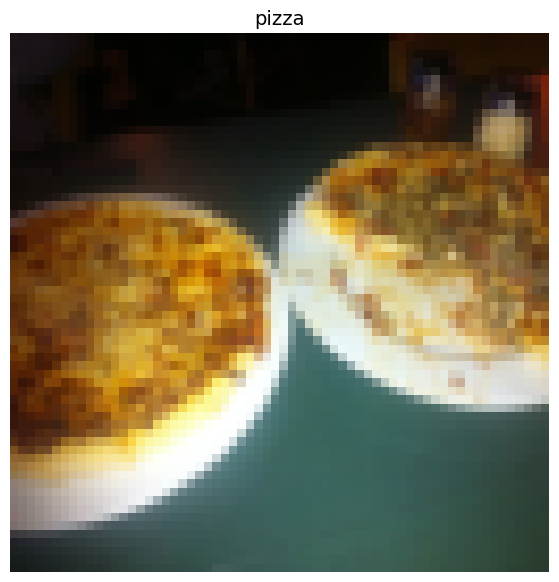

In [24]:
## rearrange the order dimensions
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"original shape: {img.shape} -> [color_channels, height, width]")
print(f"image permute: {img_permute.shape} -> [height, width, color_channels] for matplotlib")


plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(class_names[label], fontsize=14)
plt.axis(False);

##  Turn loaded images into `DataLoader`

`dataloader` helps us to convert dataset into iterables, and customise `batch_size`

In [25]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f4eb75117f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4eb7884cb0>)

In [26]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [27]:
len(train_data), len(test_data)

(225, 75)

In [28]:
img, label = next(iter(train_dataloader))

print(f"image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape : {label.shape}")

image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape : torch.Size([32])


## option 2: loading image data with a custom dataset

1. want to be able to load images from files
2. want to be able to get class names from dataset
3. want to be able to get class as dictionary from the dataset

pros:
* can create dataset out of almost everything
* not limited to pytorch pre-built dataset functions

cons:
* our own code might have perfomance issues

In [29]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [30]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Let's write a helper function capable of creating a list of class names and a dictionary of class names and their indexes given a directory path.

To do so, we'll:

Get the class names using os.scandir() to traverse a target directory (ideally the directory is in standard image classification format).


Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).


Turn the class names into a dictionary of numerical labels, one for each class.


Let's see a small example of step 1 before we write the full function.

In [31]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [32]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [33]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [34]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [35]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [36]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f4eb75a4080>,
 <__main__.ImageFolderCustom at 0x7f4eb7542750>)

In [37]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [38]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [39]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [40]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


## create a function to display random images

In [41]:
random.seed(42)
random.sample(range(len(train_data)),k=10)


[163, 28, 6, 189, 70, 62, 57, 35, 188, 26]

In [42]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n: int=10,
                          display_shape: bool=True,
                          seed: int=None):
  if n>10:
    n=10
    display_shape = False
    print("display shouldnt be more than 10")

  #set the seed
  if seed:
    random.seed(seed)

  #get random sample indexes
  random_samples_idx = random.sample(range(len(train_data)),k=n)

  #setup plot
  plt.figure(figsize=(16,8))

  #loop through the random_sample_idx and plot using matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")

    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

In [43]:
classes=train_data.classes
classes

['pizza', 'steak', 'sushi']

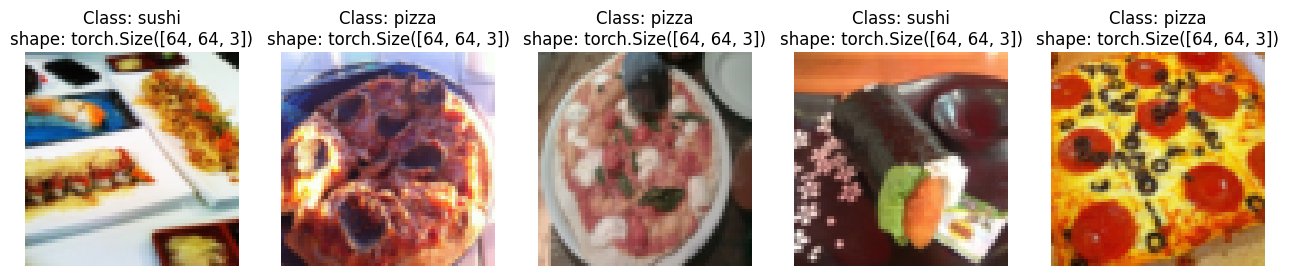

In [44]:
display_random_images(dataset=train_data,
                      classes=classes,
                      n=5,
                      display_shape=True,
                      seed=42)

## data augmentation(using transforms)

In [45]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [46]:
image_path

PosixPath('data/pizza_steak_sushi')

In [47]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/1649276.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3821701.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/220190.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1412034.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1033251.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/393658.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2285942.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2493954.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1089334.jpg')]

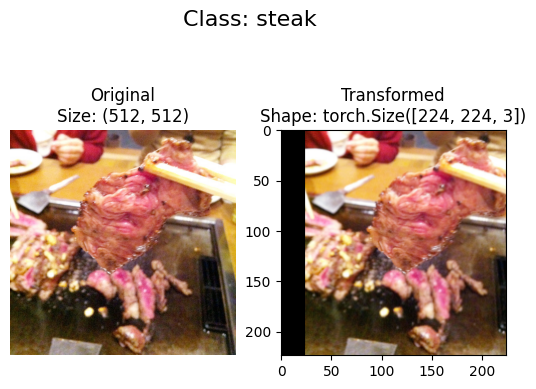

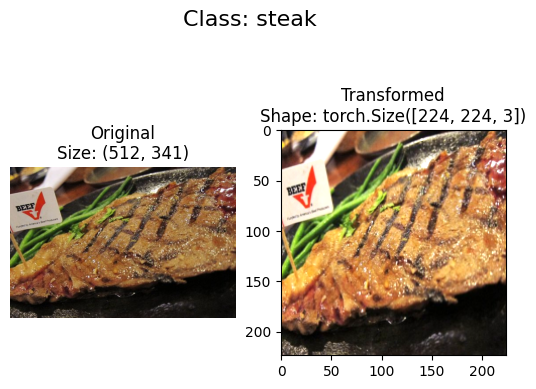

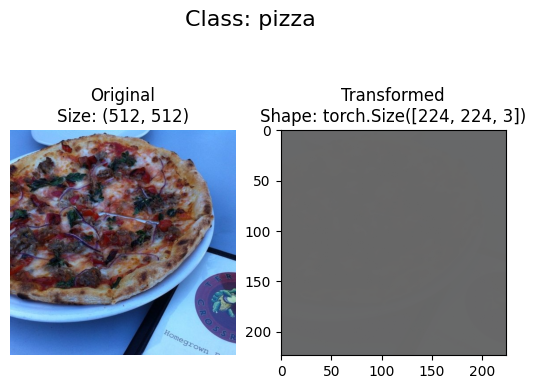

In [48]:
plot_transformed_images(image_path_list, train_transforms, n=3, seed=None)

## building baseline model TinyVGG without data augmentation

In [49]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [50]:
#load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)


## create TinyVGG model class

In [51]:
import torch.nn as nn

In [52]:
class tinyVGG(nn.Module):
  """
  TinyVGG architecture
  """

  def __init__(self, input_shape: int,
               output_shape: int,
               hidden_units: int) -> None:
               super().__init__()
               self.conv_block1 = nn.Sequential(
                   nn.Conv2d(in_channels=input_shape,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                stride=2)
               )
               self.conv_block2 = nn.Sequential(
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(2)
               )
               self.classifier = nn.Sequential(
                   nn.Flatten(),
                   nn.Linear(in_features=hidden_units,
                             out_features=output_shape)
               )
  def forward(self, x):
    x = self.conv_block1(x)
    print(x.shape)
    x = self.conv_block2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return x

    # u can do this which is better "return self.classifier (self.con_block_2(self.con_block_1(x))) which benefits from operator fusion"


In [53]:
model0 = tinyVGG(input_shape=3,
        hidden_units=10,
        output_shape=len(class_names)).to(device)

model0

tinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=3, bias=True)
  )
)

## pass a single to model and to check the shapes correctly

In [54]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [55]:
model0.eval()
with torch.inference_mode():
  model0(image_batch)

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1690 and 10x3)

## so making changes in the linear layer multiplying it with 13*13

In [56]:
class tinyVGG(nn.Module):
  """
  TinyVGG architecture
  """

  def __init__(self, input_shape: int,
               output_shape: int,
               hidden_units: int) -> None:
               super().__init__()
               self.conv_block1 = nn.Sequential(
                   nn.Conv2d(in_channels=input_shape,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                stride=2)
               )
               self.conv_block2 = nn.Sequential(
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(2)
               )
               self.classifier = nn.Sequential(
                   nn.Flatten(),
                   nn.Linear(in_features=hidden_units*13*13,
                             out_features=output_shape)
               )
  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.classifier(x)
    return x

    # u can do this which is better "return self.classifier (self.con_block_2(self.con_block_1(x))) which benefits from operator fusion"


In [57]:
model1 = tinyVGG(input_shape=3,
        hidden_units=10,
        output_shape=len(class_names)).to(device)

model1

tinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [58]:
model1.eval()
with torch.inference_mode():
  model1(image_batch)

## use of `torch.info` to get an idea of shapes going through the model

In [59]:
#install torchinfo, import if its available

try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model0, input_size=[1,3,64,64])

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])


RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Flatten: 2]

##model0 fails, and error shows
mat1 and mat2 shapes cannot be multiplied (1x1690 and 10x3)

## model1 is the corrected
so it does not pop any error

In [60]:
summary(model1, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
tinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [61]:
def train_epoch(model: nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                device: torch.device = "cpu"):
  model.train()
  train_loss, train_acc = 0,0
  correct,total = 0, 0

  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    #argmax(softmax(x)) == argmax(x) so you can just do => torch.argmax(y_pred, dim=1) that's what we will do in test loop
    correct += (y_pred_class == y).sum().item()
    total += len(y_pred) #len(y_pred) or y.size(0)

  train_loss = train_loss/len(dataloader)
  train_acc = correct/total
  return train_loss, train_acc


In [62]:
def test_epoch(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               device: torch.device = "cpu"):
  model.eval()
  test_loss, test_acc = 0,0
  correct,total = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X,y = X.to(device), y.to(device)

      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss.item()

      test_pred_class = torch.argmax(test_pred, dim=1)
      correct += (test_pred_class == y).sum().item()
      total += y.size(0)

  test_loss = test_loss/len(dataloader)
  test_acc = correct/total
  return test_loss, test_acc


In [82]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(),lr=0.1)

results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}

for epoch in tqdm(range(epochs)):
  train_loss, train_acc = train_epoch(model=model1,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
  test_loss, test_acc = test_epoch(model=model1,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

  print(f"epoch: {epoch+1} ----- train loss: {train_loss:.3f}, train_acc: {train_acc:.3f} | test loss: {test_loss:.3f}, test acc: {test_acc:.3f}")
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)



  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 1 ----- train loss: 1.121, train_acc: 0.253 | test loss: 1.102, test acc: 0.253
epoch: 2 ----- train loss: 1.077, train_acc: 0.316 | test loss: 1.145, test acc: 0.333
epoch: 3 ----- train loss: 1.083, train_acc: 0.347 | test loss: 1.192, test acc: 0.333
epoch: 4 ----- train loss: 1.138, train_acc: 0.347 | test loss: 1.172, test acc: 0.333
epoch: 5 ----- train loss: 1.104, train_acc: 0.338 | test loss: 1.165, test acc: 0.253


In [83]:
results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [84]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

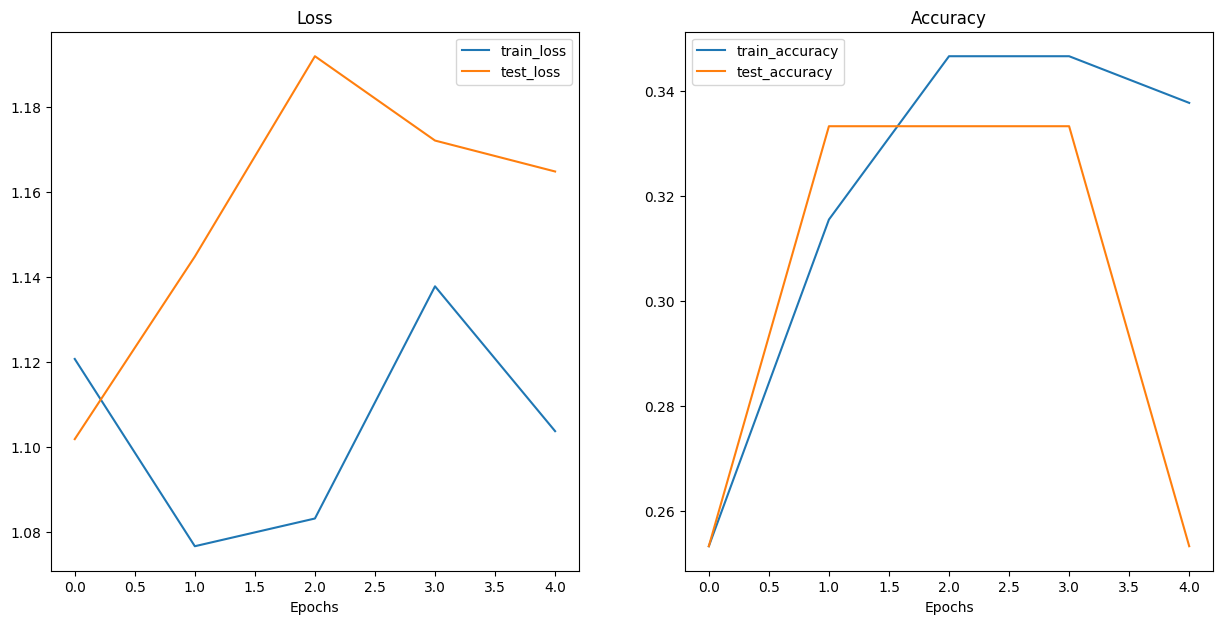

In [85]:
plot_loss_curves(results=results)

## Model2: TinyVGG with Data Augmentation

In [86]:
from torchvision import transforms
train_transforms_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [87]:
#turn images folders into datasets

from torchvision import datasets
train_aug = datasets.ImageFolder(root=train_dir,
                                 transform=train_transforms_trivial)
test_simple = datasets.ImageFolder(root=test_dir,
                                   transform=test_transforms_simple)


In [88]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)

train_aug_dataloader = DataLoader(dataset=train_aug,
                                  batch_size=BATCH_SIZE,
                                  shuffle=True,
                                  num_workers=NUM_WORKERS)

test_simple_dataloader = DataLoader(dataset=test_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


## samel model architecture but change in data

In [89]:
torch.manual_seed(42)

model2 = tinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_aug.classes))
model2

tinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [90]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(),lr=0.001)

model2_results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}

for epoch in tqdm(range(epochs)):
  train_loss, train_acc = train_epoch(model=model2,
                                      dataloader=train_aug_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
  test_loss, test_acc = test_epoch(model=model2,
                                    dataloader=test_simple_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

  print(f"epoch: {epoch+1} ----- train loss: {train_loss:.3f}, train_acc: {train_acc:.3f} | test loss: {test_loss:.3f}, test acc: {test_acc:.3f}")
  model2_results["train_loss"].append(train_loss)
  model2_results["train_acc"].append(train_acc)
  model2_results["test_loss"].append(test_loss)
  model2_results["test_acc"].append(test_acc)


  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 1 ----- train loss: 1.105, train_acc: 0.284 | test loss: 1.102, test acc: 0.333
epoch: 2 ----- train loss: 1.081, train_acc: 0.347 | test loss: 1.126, test acc: 0.333
epoch: 3 ----- train loss: 1.071, train_acc: 0.347 | test loss: 1.159, test acc: 0.333
epoch: 4 ----- train loss: 1.125, train_acc: 0.347 | test loss: 1.158, test acc: 0.333
epoch: 5 ----- train loss: 1.087, train_acc: 0.347 | test loss: 1.155, test acc: 0.427


In [91]:
results

{'train_loss': [1.1206236332654953,
  1.0765413865447044,
  1.0830661430954933,
  1.1377192735671997,
  1.1036243438720703],
 'train_acc': [0.25333333333333335,
  0.31555555555555553,
  0.3466666666666667,
  0.3466666666666667,
  0.3377777777777778],
 'test_loss': [1.101745327313741,
  1.1447235345840454,
  1.1918811996777852,
  1.1720290581385295,
  1.1647480726242065],
 'test_acc': [0.25333333333333335,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.25333333333333335]}

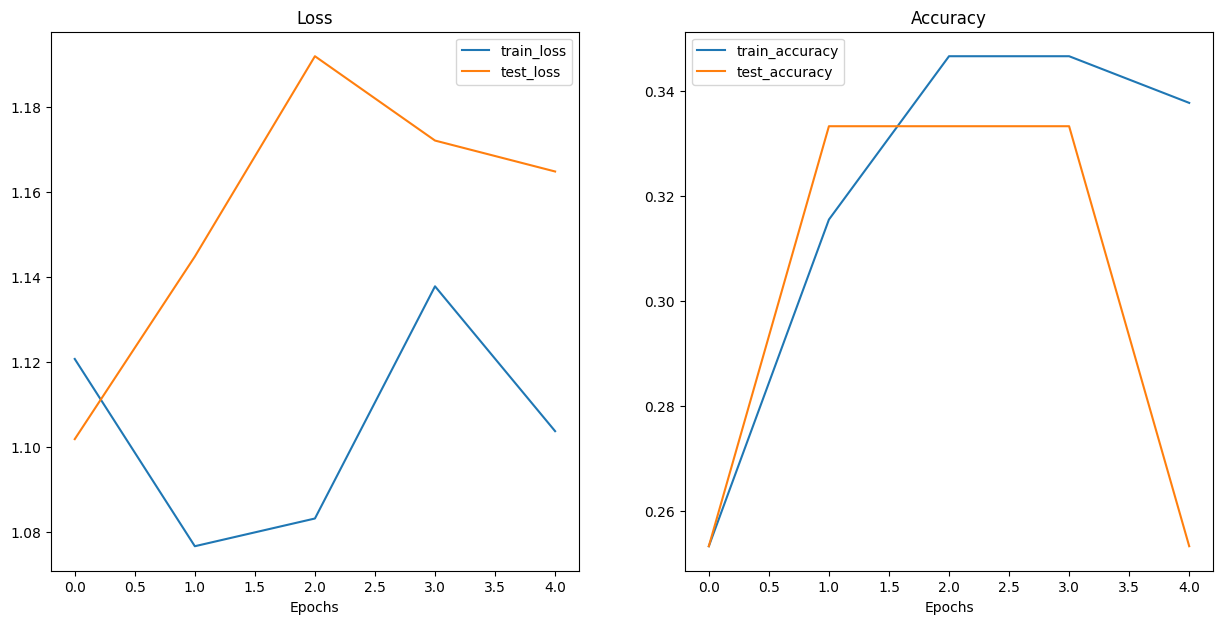

In [92]:
plot_loss_curves(results=results)

## compare model results

In [93]:
import pandas as pd
model1_df = pd.DataFrame(results)
model2_df = pd.DataFrame(model2_results)

In [94]:
model1_df

,train_loss,train_acc,test_loss,test_acc
0,1.120624,0.253333,1.101745,0.253333
1,1.076541,0.315556,1.144724,0.333333
2,1.083066,0.346667,1.191881,0.333333
3,1.137719,0.346667,1.172029,0.333333
4,1.103624,0.337778,1.164748,0.253333


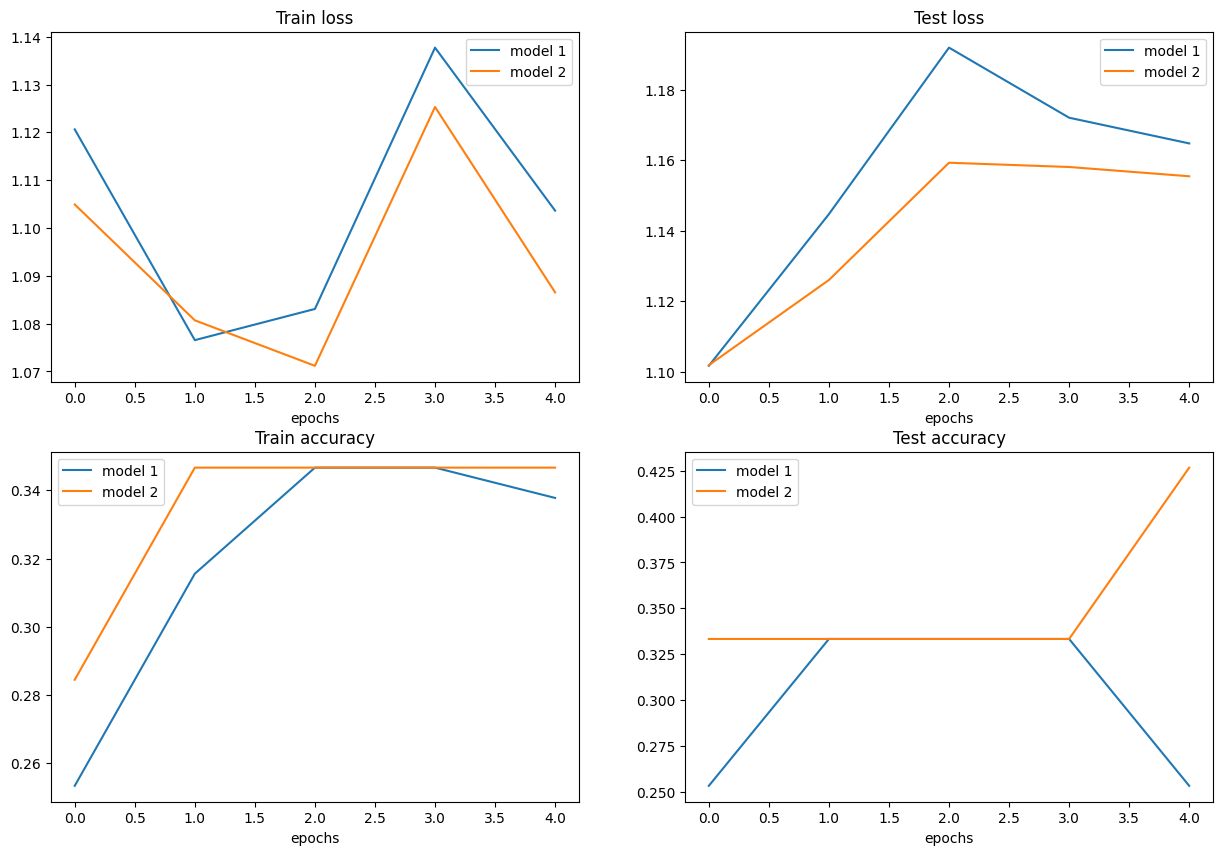

In [101]:
plt.figure(figsize=(15,10))

epochs = range(len(model1_df))

#plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model1_df['train_loss'],label="model 1")
plt.plot(epochs, model2_df['train_loss'], label="model 2")
plt.xlabel("epochs")
plt.title("Train loss")
plt.legend();

#plot test loss
plt.subplot(2,2,2)
plt.plot(epochs, model1_df['test_loss'],label="model 1")
plt.plot(epochs, model2_df['test_loss'], label="model 2")
plt.xlabel("epochs")
plt.title("Test loss")
plt.legend();

#plot train accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model1_df['train_acc'],label="model 1")
plt.plot(epochs, model2_df['train_acc'], label="model 2")
plt.xlabel("epochs")
plt.title("Train accuracy")
plt.legend();

#plot test accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model1_df['test_acc'],label="model 1")
plt.plot(epochs, model2_df['test_acc'], label="model 2")
plt.xlabel("epochs")
plt.title("Test accuracy")
plt.legend();


## predicting on custom data

In [102]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

## loading in a custom image with pytorch

we have to make sure our custom image is in the same format as the data our model was trained on

In [105]:
import torchvision as tv

In [106]:
custom_image = tv.io.read_image(str(custom_image_path))
custom_image

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

In [115]:
custom_image.shape

torch.Size([3, 4032, 3024])

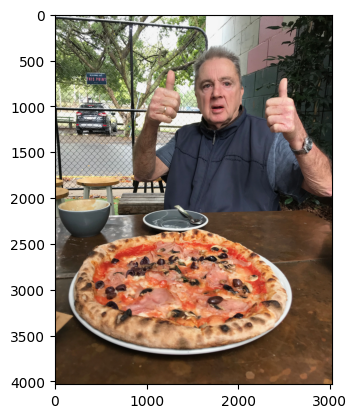

In [108]:
plt.imshow(custom_image.permute(1,2,0));

In [109]:
custom_image.dtype

torch.uint8

In [110]:
model2.eval()
with torch.inference_mode():
  model2(custom_image)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [117]:
## model was trained for float inputs so lets the datatype of the input and scale them to [0,255] by dividing by 255
custom_image_float = custom_image.type(torch.float32)/255.
custom_image_float.dtype

torch.float32

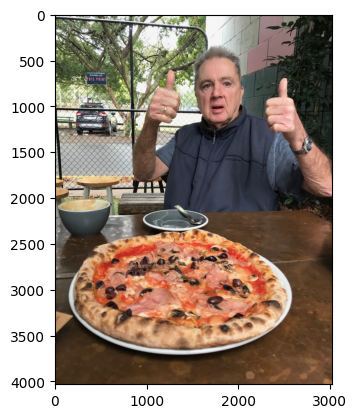

In [132]:
plt.imshow(custom_image_float.permute(1,2,0));

In [118]:
model2.eval()
with torch.inference_mode():
  model2(custom_image_float)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)

In [120]:
## image is in `torch.Size([3, 4032, 3024])` we need it in [#,64,64]
print(f"before transform: {custom_image_float.shape}")
custom_data_transform = transforms.Compose([transforms.Resize(size=(64,64))])
custom_image_float_transformed = custom_data_transform(custom_image_float)

print(f"after transform: {custom_image_float_transformed.shape}")

before transform: torch.Size([3, 4032, 3024])
after transform: torch.Size([3, 64, 64])


In [125]:
# error because of no batch size
model2.eval()
with torch.inference_mode():
  model2(custom_image_float_transformed)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [124]:
x,y = next(iter(train_dataloader))
x.shape

torch.Size([32, 3, 64, 64])

In [126]:
#addding batch size
custom_image_float_transformed_with_batch = custom_image_float_transformed.unsqueeze(0)

In [128]:
model2.eval()
with torch.inference_mode():
  custom_pred = model2(custom_image_float_transformed_with_batch)
custom_pred

tensor([[ 0.0781,  0.0379, -0.2067]])

In [130]:
pred_idx = torch.argmax(custom_pred, dim=1)
print(f"predicted label for custom image: {classes[pred_idx]}")

predicted label for custom image: pizza


## building a function for predicting custom data

In [155]:
def pred_plot_img(model: torch.nn.Module,
                  image_path: str,
                  class_names: List[str]= None,
                  transform=None,
                  device=device):
  # load in the image
  target_image = tv.io.read_image(str(image_path))

  #divide the image pixel values by 255 to get them between [0,1]
  target_image = target_image/255

  #transform if necessary
  if transform:
    target_image = transform(target_image)

  #model in target device
  model.to(device)

  #turn on eval mode
  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)
    target_image_pred = model(target_image.to(device))

  pred_class = class_names[torch.argmax(torch.softmax(target_image_pred, dim=1), dim=1)]
  max_prob = torch.softmax(target_image_pred,dim=1).max().item()
  plt.imshow(target_image.squeeze().permute(1,2,0))
  plt.title(pred_class+f" | prob: {max_prob:.3f}")
  plt.axis(False);



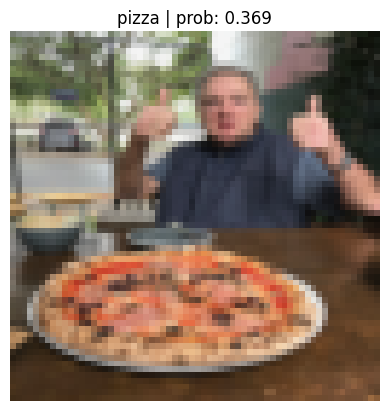

In [156]:
pred_plot_img(model2,
              image_path=custom_image_path,
              class_names=classes,
              transform=custom_data_transform,
              device="cpu")